**<h1>AI in Orthopaedics Hackathon 2024</h1>
<h3> Competition Solution (Bonus Challenge Attempted / Not Attempted) </h3>
<h3> Names of team members</h3>

In [1]:
# Import dataset and all necessary libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

vertebral_column = fetch_ucirepo(id=212) 

X = vertebral_column.data.features 
y = vertebral_column.data.targets 

# Set seed value for all training
SEED = 42

In [2]:
''' Full Dataset with Classification '''
pd.concat([X,y], axis=1)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


**

- Write down the scope of the problem, what variable there are, the goal in which we are trying to achieve, and how we are going to use an appropriate ML model (ie. Logistic Regression) to solve this problem.

- Why we chose to use logit for this problem (as opposed to algos like linear reg or decision trees)

- What are the necessary things we have to do to implement a Logistic Regression function (e.g. Sigmoid function, log-likelihood, loss function (binary cross entropy)) (probs just explain the univariate version of the function first, we can do further explanation on the multivariate version in the bonus challenge section).

- cite sklearn LogReg algo and https://www.youtube.com/watch?v=YYEJ_GUguHw

In [3]:
''' Data Cleansing '''

# Classify class data into either Normal (0) or Abnormal (1)
binary_y = pd.DataFrame(np.where(y =='Normal', 0, 1))

# Split training and testing data randomly (80-20 split)
X_train = X.sample(frac=0.8, random_state=SEED)
y_train = binary_y.sample(frac=0.8, random_state=SEED)

X_test = X.loc[X.index.difference(X_train.index)]
y_test = binary_y.loc[binary_y.index.difference(y_train.index)]

# Reformat class data into suitable NumPy arrays
y_train = y_train.to_numpy().reshape(-1)
y_test = np.array(y_test).ravel()

In [24]:
''' Implementation of the Logistic Regression Model (v1) '''

class LogisticRegressionV1():

    '''
    Initialise the model.

    @params
    lr (float): Learning rate (or step size) of loss functions.
    max_epoch (int): Maximum number of epoch.
    thres (float): The classification threshold for binary classification.
    '''
    def __init__(self, lr=0.001, max_epoch=1000):
        self.lr = lr
        self.max_epoch = max_epoch
        self.thres = 0.5
        self.weights = None
        self.bias = 0

    ''' Sigmoid Function.
    @params
    x (DataFrame): Linear combination of training data.
    @return
    DataFrame with updated probabilites. '''
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    ''' Fits model with given training data.
    @params
    X (DataFrame): Training vector
    y (Array): Class vector '''
    def fit(self, X, y):
        samples, features = X.shape
        # Initialise 0 weight for each dimension. 
        # (Set data type to float128 to prevent precision loss)
        self.weights = np.zeros(features, dtype=np.float128) 

        for _ in range(self.max_epoch):
            # Calculate w_t*x + b and apply sigmoid function.
            linear_prediction = np.dot(X, self.weights) + self.bias
            prediction = self._sigmoid(linear_prediction)
            
            # Calculate weight and bias gradient.
            dw = (1/samples) * np.dot(X.T, (prediction - y))
            db = (1/samples) * np.sum(prediction - y)

            # Calculate new weights and bias.
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    ''' Predicts classification with test data.
    @params
    X (DataFrame): Testing vector.
    @return
    Array of class predictions.'''
    def predict(self, X):
        linear_prediction = np.dot(X, self.weights) + self.bias
        prediction = self._sigmoid(linear_prediction)
        # Classify predictions as either Normal or Abnormal
        # according to the classification threshold.
        class_pred = np.array([0 if p <= self.thres else 1 for p in prediction])
        
        return class_pred

    ''' Determines accuracy of classification.
    @params
    X (DataFrame): Testing vector.
    y (Array): Class vector.
    @return
    Float of percentage accuracy.
    '''
    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.sum(predictions==y)/len(y)

    ''' Getter for weights.
    @return 
    An array of weights for each dimension'''
    def get_weights(self):
        return self.weights
        

In [25]:
''' Initialise Logistic Regression Model'''
logit_model = LogisticRegressionV1()

# Fit and predict outcome with training and testing data respectively
logit_model.fit(X_train, y_train)
predictions = logit_model.predict(X_test)

# Calculate accuracy of test
accuracy = logit_model.accuracy(X_test, y_test)

print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 77.42%


**

The first version of this model produces classification accuracy of 77.42%, below is further data analysis on our inital result. Let's take a deeper look into the results.

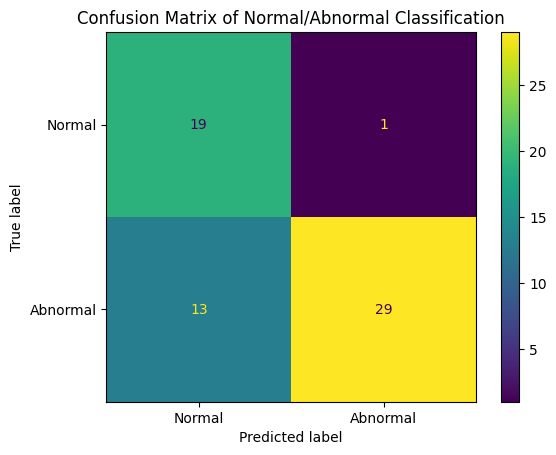

In [26]:
''' Analysis: Confusion Matrix'''
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Abnormal'])

disp.plot()
plt.title('Confusion Matrix of Normal/Abnormal Classification')
plt.show()

**

- Talk about how bottom left quadrant (True Abnormal, Predicted Normal) is bad. Quick fix would be to decrease threshold even though it is potentially sacirificing accuracy

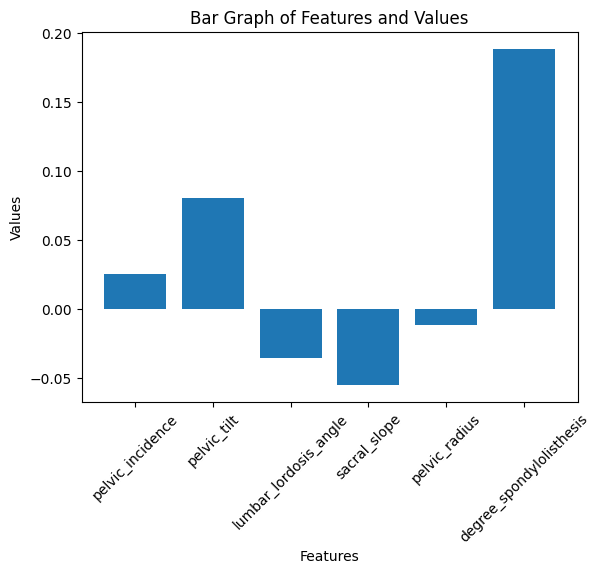

In [27]:
''' Analysis: Weighting of Features '''
weights = logit_model.get_weights()
features = X.columns.tolist()

# Correspond each feature name with its weight
feature_weights = dict(zip(features, weights))

plt.bar(feature_weights.keys(), feature_weights.values())

plt.title('Bar Graph of Features and Values');
plt.xlabel('Features');plt.ylabel('Values');
plt.xticks(rotation=45);

plt.show()

**

Talk about the +ve / -ve correlations of each feature and whether it makes sense according to "medical evidence".

**

- After a ton of graphical analysis and explanations up here ^, talk about some heuristics of how we can tweak custom weights for different dimensionality to further improve the model.

- tolerance level. Explain some maths theory on why add tolerance level (overtraining, efficiency/accuracy tradeoff)

- after model v1, maybe talk about linear separability(?)

In [42]:
''' Implementation of the Logistic Regression Model (v2) '''

class LogisticRegressionV2():

    '''
    Initialise the model.

    @params
    lr (float): Learning rate (or step size) of loss functions.
    max_epoch (int): Maximum number of epoch.
    thres (float): The classification threshold for binary classification.
    tol (float): Tolerance level of weights and bias.
    '''
    def __init__(self, lr=0.001, max_epoch=1000 , tol=0.0001):
        self.lr = lr
        self.max_epoch = max_epoch
        self.weights = None
        self.tol = tol
        self.bias = 0
        

    ''' Sigmoid Function.
    @params
    x (DataFrame): Linear combination of training data.
    @return
    DataFrame with updated probabilites. '''
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    ''' Fits model with given training data.
    @params
    X (DataFrame): Training vector
    y (Array): Class vector 
    weights (Array): Custom initial weights for each feature'''
    
    def fit(self, X, y, weights=None):
        samples, features = X.shape
        # Initialise 0 weight for each dimension. 
        # (Set data type to float128 to prevent precision loss)
        if weights is None:
            self.weights = np.zeros(features, dtype=np.float128)
        else:
            self.weights = weights

        for _ in range(self.max_epoch):
            # Calculate w_t*x + b and apply sigmoid function.
            linear_prediction = np.dot(X, self.weights) + self.bias
            prediction = self._sigmoid(linear_prediction)
            
            # Calculate weight and bias gradient.
            dw = (1/samples) * np.dot(X.T, (prediction - y))
            db = (1/samples) * np.sum(prediction - y)

            # Check if gradient is below tolerance threshold.
            if dw.all() <= self.tol and db <= self.tol:
                break
                
            # Calculate new weights and bias.
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    ''' Predicts classification with test data.
    @params
    X (DataFrame): Testing vector.
    @return
    Array of class predictions.'''
    def predict(self, X, thres=0.5):
        linear_prediction = np.dot(X, self.weights) + self.bias
        prediction = self._sigmoid(linear_prediction)
        # Classify predictions as either Normal or Abnormal
        # according to the classification threshold.
        class_pred = np.array([0 if p <= thres else 1 for p in prediction])
        
        return class_pred

    ''' Determines accuracy of classification.
    @params
    X (DataFrame): Testing vector.
    y (Array): Class vector.
    @return
    Float of percentage accuracy.
    '''
    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.sum(predictions==y)/len(y)

    ''' Getter for weights.
    @return 
    An array of weights for each dimension'''
    def get_weights(self):
        return self.weights
        

In [46]:
''' Initialise Logistic Regression Model'''
logit_model = LogisticRegressionV2()

custom_weights = [0,0,0,0,0,1]

# Fit and predict outcome with training and testing data respectively
logit_model.fit(X_train, y_train, weights=custom_weights)
predictions_1 = logit_model.predict(X_test)

# Calculate accuracy of test
accuracy = logit_model.accuracy(X_test, y_test)

print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 85.48%


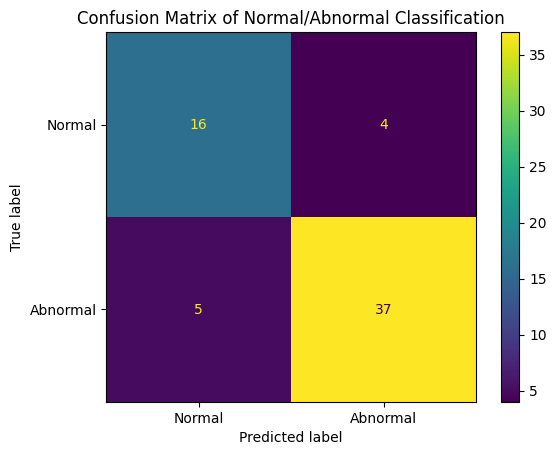

In [47]:
''' Analysis: Confusion Matrix with Threshold = 0.5'''
cm = confusion_matrix(y_test, predictions_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Abnormal'])

disp.plot()
plt.title('Confusion Matrix of Normal/Abnormal Classification')
plt.show()

**

With this new model, bottom False Positives have significantly decreased. Now let's see what happens when we tweak threshold.

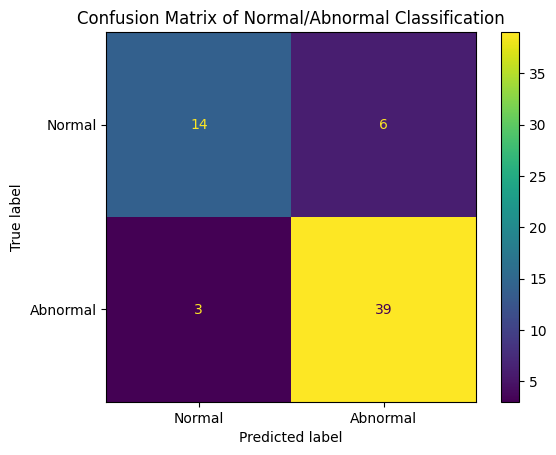

In [48]:
''' Analysis: Confusion Matrix with Threshold = 0.3'''

predictions_2 = logit_model.predict(X_test, thres=0.3)

cm = confusion_matrix(y_test, predictions_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Abnormal'])

disp.plot()
plt.title('Confusion Matrix of Normal/Abnormal Classification')
plt.show()

**

